In [11]:
# import
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import math
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from numpy import split
from numpy import array

In [12]:
# house 1 power
blk1=r"/Volumes/Expansion Drive/dataverse_files/house1_power_blk1.csv"
blk2=r"/Volumes/Expansion Drive/dataverse_files/house1_power_blk2.csv"

# house 2 power
blk3=r"/Volumes/Expansion Drive/dataverse_files/house2_power_blk1.csv"

In [13]:
df1 = pd.read_csv(blk1, sep = ",", parse_dates=['unix_ts'])
df2 = pd.read_csv(blk2, sep = ",", parse_dates=['unix_ts'])
df3 = pd.read_csv(blk3, sep = ",", parse_dates=['unix_ts'])

In [14]:
from datetime import datetime

#transform time from unix timestamp to YYYY-MM-DD HHMMSS
df1['unix_ts']=pd.to_datetime(df1['unix_ts'],unit='s')
df2['unix_ts']=pd.to_datetime(df2['unix_ts'],unit='s')
df3['unix_ts']=pd.to_datetime(df3['unix_ts'],unit='s')

In [15]:
# set index column
df1 = df1.set_index('unix_ts')
df2 = df2.set_index('unix_ts')
df3 = df3.set_index('unix_ts')

In [16]:
# select appliances

kitchen_plugs=df1["sub3"]+df1["sub4"]
df1["kitchen_plugs"]=kitchen_plugs

dryer=df1["sub5"]+df1["sub6"]
df1["dryer"]=dryer

kitchen_plugs=df2["sub3"]+df2["sub4"]
df2["kitchen_plugs"]=kitchen_plugs

dryer=df2["sub5"]+df2["sub6"]
df2["dryer"]=dryer

dryer=df3["sub4"]+df3["sub5"]
df3["dryer"]=dryer

kitchen_plugs=df3["sub14"]+df3["sub15"]
df3["kitchen_plugs"]=kitchen_plugs

df1=df1.rename(columns={'sub9':'cloth_washer', 'sub8':'fridge'})
df2=df2.rename(columns={'sub9':'cloth_washer', 'sub8':'fridge'})
df3=df3.rename(columns={'sub10':'cloth_washer', 'sub11':'fridge'})

In [17]:
df1=df1.filter(['unix_ts', 'kitchen_plugs', 'dryer', 'cloth_washer', 'fridge'])
df2=df2.filter(['unix_ts', 'kitchen_plugs', 'dryer', 'cloth_washer', 'fridge'])
df3=df3.filter(['unix_ts', 'kitchen_plugs', 'dryer', 'cloth_washer', 'fridge'])

In [18]:
# get full weeks for model to train/test/validate on

# 9 full weeks house 1
df1=df1.loc['2016-02-08 00:00:00':'2016-02-14 23:59:59']
df2=df2.loc['2016-03-07':'2016-05-01']

# 7 full weeks house 2
df3=df3.loc['2017-09-18':'2017-11-05']

In [19]:
df=df1.append(df2)

In [20]:
#training data
df=df.filter(['fridge'])
print(df)

                     fridge
unix_ts                    
2016-02-08 00:00:00   126.0
2016-02-08 00:00:01   126.0
2016-02-08 00:00:02   126.0
2016-02-08 00:00:03   126.0
2016-02-08 00:00:04   125.0
...                     ...
2016-05-01 23:59:55   137.0
2016-05-01 23:59:56   137.0
2016-05-01 23:59:57   137.0
2016-05-01 23:59:58   137.0
2016-05-01 23:59:59   136.0

[5443200 rows x 1 columns]


In [21]:
#validation data
df3=df3.filter(['fridge'])
print(df3)

                     fridge
unix_ts                    
2017-09-18 00:00:00     4.0
2017-09-18 00:00:01     4.0
2017-09-18 00:00:02     4.0
2017-09-18 00:00:03     4.0
2017-09-18 00:00:04     4.0
...                     ...
2017-11-05 23:59:55     4.0
2017-11-05 23:59:56     4.0
2017-11-05 23:59:57     4.0
2017-11-05 23:59:58     4.0
2017-11-05 23:59:59     4.0

[4233600 rows x 1 columns]


In [20]:
#return data as a list
values=df.values.tolist()

In [21]:
values

[[1.0, 0.0, 0.0, 126.0],
 [1.0, 0.0, 0.0, 126.0],
 [1.0, 0.0, 0.0, 126.0],
 [1.0, 0.0, 0.0, 126.0],
 [1.0, 0.0, 0.0, 125.0],
 [1.0, 0.0, 0.0, 126.0],
 [1.0, 0.0, 0.0, 125.0],
 [1.0, 0.0, 0.0, 126.0],
 [1.0, 0.0, 0.0, 125.0],
 [1.0, 0.0, 0.0, 125.0],
 [1.0, 0.0, 0.0, 125.0],
 [1.0, 0.0, 0.0, 125.0],
 [1.0, 0.0, 0.0, 125.0],
 [1.0, 0.0, 0.0, 125.0],
 [1.0, 0.0, 0.0, 125.0],
 [1.0, 0.0, 0.0, 125.0],
 [1.0, 0.0, 0.0, 125.0],
 [1.0, 0.0, 0.0, 125.0],
 [1.0, 0.0, 0.0, 125.0],
 [1.0, 0.0, 0.0, 125.0],
 [1.0, 0.0, 0.0, 125.0],
 [1.0, 0.0, 0.0, 125.0],
 [1.0, 0.0, 0.0, 125.0],
 [1.0, 0.0, 0.0, 125.0],
 [1.0, 0.0, 0.0, 125.0],
 [1.0, 0.0, 0.0, 125.0],
 [1.0, 0.0, 0.0, 125.0],
 [1.0, 0.0, 0.0, 124.0],
 [1.0, 0.0, 0.0, 125.0],
 [1.0, 0.0, 0.0, 125.0],
 [1.0, 0.0, 0.0, 125.0],
 [1.0, 0.0, 0.0, 125.0],
 [1.0, 0.0, 0.0, 124.0],
 [1.0, 0.0, 0.0, 124.0],
 [1.0, 0.0, 0.0, 124.0],
 [1.0, 0.0, 0.0, 124.0],
 [1.0, 0.0, 0.0, 124.0],
 [1.0, 0.0, 0.0, 124.0],
 [1.0, 0.0, 0.0, 124.0],
 [1.0, 0.0, 0.0, 124.0],


In [22]:
# standardize features by removing mean and scaling to unit variance around 0
scaler=StandardScaler()
scaled=scaler.fit_transform(values)

In [23]:
scaled

array([[-0.09839013, -0.10416949, -0.11087069,  1.05359569],
       [-0.09839013, -0.10416949, -0.11087069,  1.05359569],
       [-0.09839013, -0.10416949, -0.11087069,  1.05359569],
       ...,
       [-0.08481986,  9.69543033, -0.11087069,  1.20855835],
       [-0.08481986,  9.67593941, -0.11087069,  1.20855835],
       [-0.08481986,  9.70625862, -0.11087069,  1.19447084]])

In [22]:
## randomly add NaN to dataframe to get "anomalous" data
print(df.count().sum())
# 5443197 data points for house 1
print(df3.count().sum())
# 4233598 data points for house 2

5443197
4233598


In [23]:
# randomly create boolean array same size as our dataframes
nan_df = np.random.random(df.shape)<0.0002
nan_df3 = np.random.random(df3.shape)<0.0002
print(nan_df.sum()) #1037 NaNs that we will be adding to df
print(nan_df3.sum()) #848 NaNs that we will be adding to df3

1064
838


In [24]:
# create NaN datasets
df_NaN = df.mask(nan_df) 
df3_NaN = df3.mask(nan_df3) # anomalous df for house 2

In [25]:
# anomalous test datasets
df_ano=df_NaN.fillna(2000) # anomalous df for house 1
df3_ano=df3_NaN.fillna(2000) # anomalous df for house 2

In [26]:
print(df_ano)

                     fridge
unix_ts                    
2016-02-08 00:00:00   126.0
2016-02-08 00:00:01   126.0
2016-02-08 00:00:02   126.0
2016-02-08 00:00:03   126.0
2016-02-08 00:00:04   125.0
...                     ...
2016-05-01 23:59:55   137.0
2016-05-01 23:59:56   137.0
2016-05-01 23:59:57   137.0
2016-05-01 23:59:58   137.0
2016-05-01 23:59:59   136.0

[5443200 rows x 1 columns]


In [27]:
#normalize dataset 

df_norm=df
df_norm=((df_norm-df_norm.min())/(df_norm.max()-df_norm.min()))

df3_norm=df3
df3_norm=((df3_norm-df3_norm.min())/(df3_norm.max()-df3_norm.min()))

df_ano_norm=df_ano
df_ano_norm=((df_ano_norm-df_ano_norm.min())/(df_ano_norm.max()-df_ano_norm.min()))

df3_ano_norm=df3_ano
df3_ano_norm=((df3_ano_norm-df3_ano_norm.min())/(df3_ano_norm.max()-df3_ano_norm.min()))

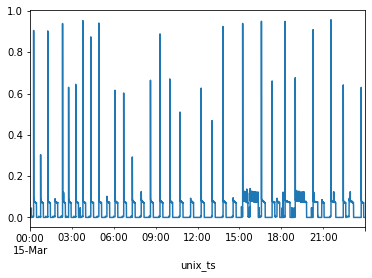

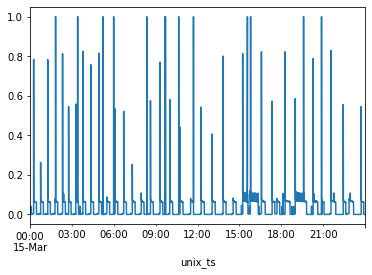

In [29]:
# timeseries for house 1 with and without anomalies exemplified on one day
df_plot=df_norm.loc['2016-03-15 00:00:00':'2016-03-15 23:59:59']
df_plot2=df_ano_norm.loc['2016-03-15 00:00:00':'2016-03-15 23:59:59']

fig, ax = plt.subplots()
df_plot.plot(legend=False, ax=ax)
plt.show()

fig, ax = plt.subplots()
df_plot2.plot(legend=False, ax=ax)
plt.show()

In [30]:
# train and test datasets
train=df_norm
test=df3_ano_norm
len(train)

5443200

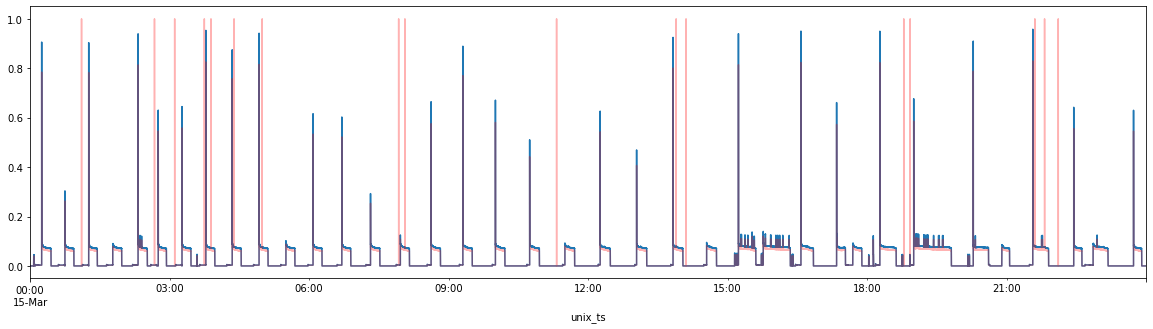

In [21]:
# visualization of training dataset
df_plot1=df_norm.loc['2016-03-15']
df_plot2=df_ano_norm.loc['2016-03-15']


fig, ax = plt.subplots(figsize=(20,5))
df_plot1.plot(legend=False, ax=ax,)
df_plot2.plot(legend=False, ax=ax, color="r", alpha=0.3)
plt.show()



In [ ]:
# create sequences combining TIME_STEPS data values from the tarining data
TIME_STEPS = 86400

# Generated training sequences for use in the model.
def create_sequences(values, time_steps=TIME_STEPS):
    output = []
    for i in range(len(values) - time_steps + 1):
        output.append(values[i : (i + time_steps)])
    return np.stack(output)


x_train = create_sequences(train.values)
print("Training input shape: ", x_train.shape)


In [ ]:
keras.backend.clear_session()

In [ ]:
model = keras.Sequential(
    [
        layers.Input(shape=(trainX.shape[1], trainX.shape[2])),
        layers.Conv1D(
            filters=32, kernel_size=32, padding="same", strides=20, activation="relu"
        ),
        layers.Dropout(rate=0.02),
        layers.Conv1D(
            filters=16, kernel_size=32, padding="same", strides=20, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=32, padding="same", strides=20, activation="relu"
        ),
        layers.Dropout(rate=0.02),
        layers.Conv1DTranspose(
            filters=32, kernel_size=32, padding="same", strides=20, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=32, padding="same"),
    ]
)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss="mse")
model.summary()


In [65]:
history = model.fit(
    trainX,
    trainY,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/50
1/1 [==============================] - 9s 9s/step - loss: 0.0057 - val_loss: nan
Epoch 2/50


KeyboardInterrupt: 

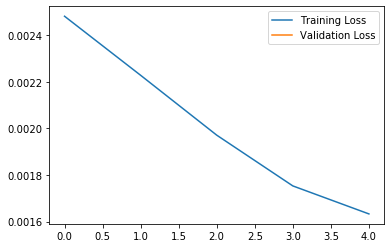

In [139]:
# plot training and validation loss
plt.plot(figsize=(20,5))
plt.plot(history.history["loss"], label="Training Loss",)
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

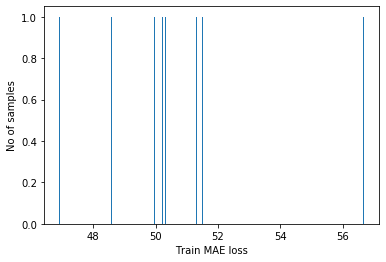

Reconstruction error threshold:  nan


In [115]:
# detect anomalies be determining how well our model can reconstruct the input data
# Get train MAE loss.
x_train_pred = model.predict(x_train)
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

plt.hist(train_mae_loss, bins=500)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)


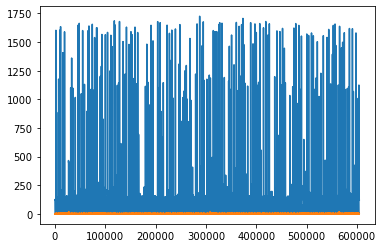

In [116]:
# Checking how the first sequence is learnt
plt.plot(x_train[1])
plt.plot(x_train_pred[1])
plt.show()

In [40]:
# Get test MAE loss.
x_test_pred = model.predict(x_test)
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)
test_mae_loss = test_mae_loss.reshape((-1))

plt.hist(test_mae_loss, bins=50)
plt.xlabel("test MAE loss")
plt.ylabel("No of samples")
plt.show()

# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold
print("Number of anomaly samples: ", np.sum(anomalies))
print("Indices of anomaly samples: ", np.where(anomalies))

ValueError: in user code:

    /Users/zoethorne/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1478 predict_function  *
        return step_function(self, iterator)
    /Users/zoethorne/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/zoethorne/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/zoethorne/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/zoethorne/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/zoethorne/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1461 run_step  **
        outputs = model.predict_step(data)
    /Users/zoethorne/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1434 predict_step
        return self(x, training=False)
    /Users/zoethorne/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/zoethorne/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:234 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: : expected min_ndim=3, found ndim=2. Full shape received: (32, 1)


In [41]:
#plot anomalies
# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
# TIME_STEPS --> seconds for one week 604800

TIME_STEPS=604800
anomalous_data_indices = []
for data_idx in range(TIME_STEPS - 1, len(test) - TIME_STEPS + 1):
    if np.all(anomalies[data_idx - TIME_STEPS + 1 : data_idx]):
        anomalous_data_indices.append(data_idx)


NameError: name 'anomalies' is not defined

TypeError: no numeric data to plot

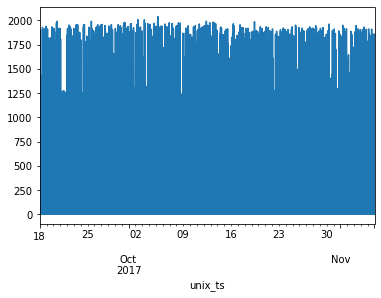

In [42]:
df_subset = test.iloc[anomalous_data_indices]
fig, ax = plt.subplots()
test.plot(legend=False, ax=ax)
df_subset.plot(legend=False, ax=ax, color="r")
plt.show()